In [1]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
X, y = mnist["data"], mnist["target"]

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
X = X / 255

In [0]:
import numpy as np

y_new = np.zeros(y.shape)
y_new[np.where(y == 0.0)[0]] = 1
y = y_new

In [0]:
m = 60000
m_test = X.shape[0] - m

X_train, X_test = X[:m].T, X[m:].T
y_train, y_test = y[:m].reshape(1,m), y[m:].reshape(1,m_test)

In [0]:
np.random.seed(138)
shuffle_index = np.random.permutation(m)
X_train, y_train = X_train[:,shuffle_index], y_train[:,shuffle_index]

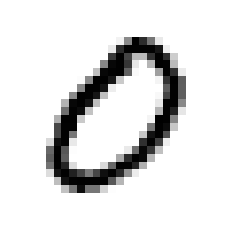

[1.]


In [6]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

i = 3
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
print(y_train[:,i])

In [0]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [0]:
def compute_loss(Y, Y_hat):

    m = Y.shape[1]
    L = -(1./m) * ( np.sum( np.multiply(np.log(Y_hat),Y) ) + np.sum( np.multiply(np.log(1-Y_hat),(1-Y)) ) )

    return L

In [9]:
learning_rate = 1

X = X_train
Y = y_train

n_x = X.shape[0]
m = X.shape[1]

W = np.random.randn(n_x, 1) * 0.01
b = np.zeros((1, 1))

for i in range(2000):
    Z = np.matmul(W.T, X) + b
    A = sigmoid(Z)

    cost = compute_loss(Y, A)

    dW = (1/m) * np.matmul(X, (A-Y).T)
    db = (1/m) * np.sum(A-Y, axis=1, keepdims=True)

    W = W - learning_rate * dW
    b = b - learning_rate * db

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  0.6840801595436431
Epoch 100 cost:  0.041305162058342754
Epoch 200 cost:  0.03578100961598483
Epoch 300 cost:  0.03321767707346867
Epoch 400 cost:  0.031618250521307165
Epoch 500 cost:  0.030479879921669624
Epoch 600 cost:  0.029609158581624707
Epoch 700 cost:  0.028912781392366863
Epoch 800 cost:  0.028338723798575546
Epoch 900 cost:  0.027854953682088075
Epoch 1000 cost:  0.02744030579355481
Epoch 1100 cost:  0.027080051475541836
Epoch 1200 cost:  0.02676353157328078
Epoch 1300 cost:  0.026482792781261255
Epoch 1400 cost:  0.026231753648863553
Epoch 1500 cost:  0.026005669485284065
Epoch 1600 cost:  0.02580077544360537
Epoch 1700 cost:  0.02561404072768779
Epoch 1800 cost:  0.02544299474890846
Epoch 1900 cost:  0.025285601356506867
Final cost: 0.025141566084818247


In [10]:
from sklearn.metrics import classification_report, confusion_matrix

Z = np.matmul(W.T, X_test) + b
A = sigmoid(Z)

predictions = (A>.5)[0,:]
labels = (y_test == 1)[0,:]

print(confusion_matrix(predictions, labels))

[[8980   33]
 [  40  947]]


In [11]:
print(classification_report(predictions, labels))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      9013
        True       0.97      0.96      0.96       987

    accuracy                           0.99     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.99      0.99      0.99     10000



In [20]:
X = X_train
Y = y_train

n_x = X.shape[0]
n_h = 64
learning_rate = 1

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(1, n_h)
b2 = np.zeros((1, 1))

for i in range(2000):

    Z1 = np.matmul(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2, A1) + b2
    A2 = sigmoid(Z2)

    cost = compute_loss(Y, A2)

    dZ2 = A2-Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if i % 100 == 0:
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)
Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = sigmoid(Z2)

predictions = (A2>.5)[0,:]
labels = (y_test == 1)[0,:]

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

Epoch 0 cost:  3.1834449726619134
Epoch 100 cost:  0.36194938156541195
Epoch 200 cost:  0.3363752372712263
Epoch 300 cost:  0.32832568871385226
Epoch 400 cost:  0.32512272160762395
Epoch 500 cost:  0.3236596379771453
Epoch 600 cost:  0.32292011469382653
Epoch 700 cost:  0.32251278464034194
Epoch 800 cost:  0.32226983573771023
Epoch 900 cost:  0.32211345603640307
Epoch 1000 cost:  0.32200521670863586
Epoch 1100 cost:  0.3219250853402025
Epoch 1200 cost:  0.3218621163461469
Epoch 1300 cost:  0.3218100794737228
Epoch 1400 cost:  0.3217652985380976
Epoch 1500 cost:  0.32172553181525604
Epoch 1600 cost:  0.321689368149367
Epoch 1700 cost:  0.3216558902506108
Epoch 1800 cost:  0.3216244818739731
Epoch 1900 cost:  0.3215947148706152
Final cost: 0.32156656016368024
[[9020  980]
 [   0    0]]
              precision    recall  f1-score   support

       False       1.00      0.90      0.95     10000
        True       0.00      0.00      0.00         0

    accuracy                           0.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [21]:
mnist = fetch_mldata('MNIST original')
X, y = mnist["data"], mnist["target"]

X = X / 255

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
digits = 10
examples = y.shape[0]

y = y.reshape(1, examples)

Y_new = np.eye(digits)[y.astype('int32')]
Y_new = Y_new.T.reshape(digits, examples)

In [0]:
m = 60000
m_test = X.shape[0] - m

X_train, X_test = X[:m].T, X[m:].T
Y_train, Y_test = Y_new[:,:m], Y_new[:,m:]

shuffle_index = np.random.permutation(m)
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]

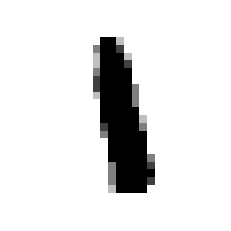

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [24]:
i = 12
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
Y_train[:,i]

In [0]:
def compute_multiclass_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L